In [1]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers,models,optimizers

In [2]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

In [7]:
##(404,13) 404 EJEMPLARES, CON 13 ATRIBUTOS DE CADA NEURONA
print(train_data.shape)
train_data[0]

(404, 13)


13

In [18]:
train_labels.shape ## no es un tensor OJO YA ENCONTRAMOS ALGO A CORREGIR

(404,)

In [19]:
train_labels[0] ## OBTIENE SOLO UN VALOR Y ES DE 15000 DOLARES

15.2

In [20]:
train_data[0] ## PODEMOS OBSERVAR QUE HAY VALORES MUY DISTANTES, ES DIFICIL PARA UNA RED NEURONAL TRABAJAR DE ESTA FORMA
### LO MEJOR SERIA NORMALIZAR


array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [21]:
## NORMALIZAMOS LOS DATOS, RESTAR LA MEDIA Y DIVIDIR POR LA DESVIACIÓN ESTANDAR

mean=train_data.mean(axis=0)
train_data=train_data-mean
std=train_data.std(axis=0)
train_data=train_data/std

test_data=test_data-mean ## USO LA MEDIA DE MI CAPA DE ENTRENAMIENTO
std=test_data.std(axis=0)
test_data=test_data/std

In [22]:
def build_model_regression(lr,input_data):
    model=models.Sequential()
    model.add(layers.Dense(64,activation="relu",input_shape=(input_data,))) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
    model.add(layers.Dense(64,activation="relu"))
    model.add(layers.Dense(1)) ## COMO ES LINEAL LA SALIDA NO NECESITO PONERLE UNA CAPA DE ACTIVACIÓN
    model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss="mse",metrics=["mae"])
    return model
### PARA REGRESION SE USA LOSS="MSE" Y METRICS = "MAE"

In [23]:
## 4 SETS DE VALIDACIONES

k=4
num_val_samples=len(train_data)//k
num_epoch=500
all_history=[]

In [24]:
for i in range(k):
    print("Fold:",i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_labels[i*num_val_samples:(i+1)*num_val_samples]

    partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_labels[:i*num_val_samples],train_labels[(i+1)*num_val_samples:]],axis=0)
    
    model=build_model_regression(0.001,13)
    history=model.fit(partial_train_data,partial_train_targets,epochs=num_epoch,batch_size=16,validation_data=(val_data,val_targets),verbose=0)
    all_history.append(history.history["val_mae"])


Fold: 0


c:\Users\DeLL-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Fold: 1
Fold: 2
Fold: 3


In [25]:
pd.DataFrame(all_history)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,18.219635,14.309616,9.801969,6.258868,4.654944,3.777318,3.297206,3.145150,2.977089,2.921223,...,2.469505,2.343656,2.459742,2.431637,2.478261,2.427048,2.420624,2.450511,2.337171,2.428869
1,18.772873,15.219233,11.204703,7.961453,6.202364,5.052090,4.268800,3.871251,3.596288,3.409217,...,2.875933,2.756217,2.723310,2.592697,2.747816,2.765074,2.720176,2.662562,2.543692,2.703503
2,16.658703,12.082880,8.023048,5.779724,4.564302,4.083430,3.812231,3.637496,3.489988,3.380426,...,2.731449,2.695995,2.666914,2.662329,2.659565,2.699238,2.657500,2.732796,2.673922,2.653453
3,21.136133,17.584032,13.489182,9.662160,7.377482,6.017179,5.081375,4.424088,4.076570,3.775612,...,2.113909,2.028008,2.057905,2.005133,2.068241,1.953272,1.987740,2.002249,2.047537,1.952852


In [26]:
### TOMAREMOS TODOS LOS ERRORES DE NUESTRAS 4 ITERACIONES DE MODELOS Y LOS PROMEDIAMOS:

all_mea_avg=pd.DataFrame(all_history).mean(axis=0)
all_mea_avg

0      18.696836
1      14.798940
2      10.629725
3       7.415551
4       5.699773
         ...    
495     2.461158
496     2.446510
497     2.462030
498     2.400580
499     2.434669
Length: 500, dtype: float64

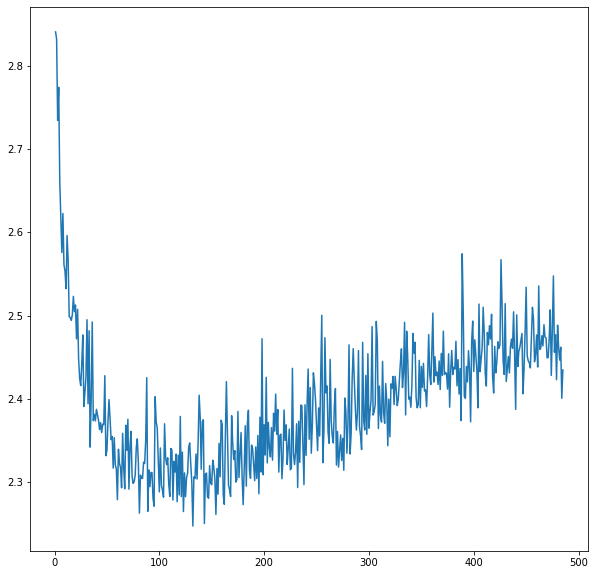

In [29]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mea_avg[15:])+1),all_mea_avg[15:])
plt.show()

In [30]:
model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 13.8766 - mae: 2.8395


[13.876592636108398, 2.83954119682312]